In [1]:
import sys
import xml.etree.ElementTree as ET
import numpy as np
from  scipy.spatial.distance import cdist
import glob
import time
import cv2
import matplotlib.pyplot as plt 

In [12]:
def get_data_from_xml(xml):
    tree = ET.parse(xml)
    root = tree.getroot()
    num_objects = (len(root.findall('object')))
    bbox_array = np.empty([num_objects,4], dtype=int)
    object_type_list = []

    for idx,  annotation_object in enumerate(root.findall('object')):
        object_type = annotation_object.find('name').text
        object_type_list.append(object_type)
        bbox = annotation_object.find('bndbox')
        xmin = bbox.find('xmin').text
        ymin = bbox.find('ymin').text
        xmax = bbox.find('xmax').text
        ymax = bbox.find('ymax').text
        bbox_array[idx][:] = [xmin, ymin, xmax, ymax]
 
    return object_type_list, bbox_array

def calc_min_distance(points_2d):
    distance_mat = cdist(points_2d, points_2d)
    #print(distance_mat)
    min_distance = np.Inf   
    row_idx, col_idx = np.triu_indices(distance_mat.shape[0],1)
    for i in range(len(row_idx)):
        if distance_mat[row_idx[i], col_idx[i]] < min_distance:
            min_distance = distance_mat[row_idx[i], col_idx[i]]
  
    return min_distance


In [13]:
def bbox_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [25]:
f = open("/home/lukas/Videos/sugarbeet_2021/gelabelt.txt", "r")
folder_list = f.read().split("\n")
print(folder_list[1])

ratio_x = np.array(0)
ratio_y = np.array(0)

print(ratio)

for folder in folder_list:
    xml_list = glob.glob(folder + '/*.xml')
    for xml in xml_list:
        object_type_list, bbox_array = get_data_from_xml(xml)
        ratio_x = np.append(ratio_x, (bbox_array[:,2] - bbox_array[:,0]) / (bbox_array[:,3] - bbox_array[:,1]))
        
print(ratio_x)
    

/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-27-18_camera_1
0
[0.         2.17058824 0.45730028 ... 0.67204301 1.52571429 0.8423913 ]


(array([1.000e+00, 1.000e+00, 3.100e+01, 1.610e+02, 5.090e+02, 9.300e+02,
        1.220e+03, 1.431e+03, 1.401e+03, 1.374e+03, 1.191e+03, 1.146e+03,
        9.210e+02, 7.520e+02, 6.670e+02, 5.410e+02, 4.180e+02, 3.750e+02,
        2.830e+02, 2.020e+02, 1.930e+02, 1.580e+02, 1.350e+02, 1.070e+02,
        9.100e+01, 8.200e+01, 5.800e+01, 5.200e+01, 5.400e+01, 3.700e+01,
        2.900e+01, 2.500e+01, 3.000e+01, 2.000e+01, 2.700e+01, 1.800e+01,
        1.800e+01, 1.900e+01, 7.000e+00, 1.300e+01, 1.400e+01, 1.200e+01,
        5.000e+00, 3.000e+00, 1.000e+01, 4.000e+00, 9.000e+00, 4.000e+00,
        3.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 6.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

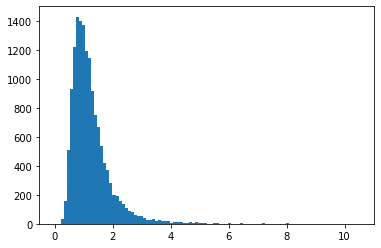

In [49]:
plt.hist(ratio_x, bins=100)

anchors:
0.3
0.5
0.75
1
1.3333
2
3.3333